In [107]:
import numpy as np
import matplotlib.pyplot as plt

In [108]:
Te = 1
T = 100
sig_Q = 1
sig_px = 30
sig_py = 30
sig_angle = np.pi / 180
sig_dist = 10

R = np.array([[sig_dist**2,0],
             [0,sig_angle**2]])

Q = (sig_Q**2)*np.array([[(Te**3)/3,(Te**2)/2,0,0],
                       [(Te**2)/2,Te,0,0],
                       [0,0,(Te**3)/3,(Te**2)/2],
                       [0,0,(Te**2)/2,Te]])

F = np.array([[1,Te,0,0],
            [0,1,0,0],
            [0,0,1,Te],
            [0,0,0,1]])

H = np.array([[1,0,0,0,],
            [0,0,1,0]])

x_init = np.transpose(np.array([3,40,-4,20]))
x_kalm = x_init

P_kalm = np.eye(4,dtype=int)

theta = np.arctan(x_init[2]/x_init[0])
r = np.sqrt(x_init[0]**2 + x_init[2]**2)


In [109]:
def creer_trajectoire(F,Q,x_init,T):
    l=[]
    vecteur_x = x_init
    for i in range(1,T+1):
        random_array = np.random.multivariate_normal(np.zeros(4), Q)
        vecteur_x = np.dot(F,vecteur_x) + random_array
        l.append(vecteur_x)
    vecteur_x = np.transpose(np.array(l))
    return vecteur_x


vecteur_x = creer_trajectoire(F,Q,x_init,T)

print(vecteur_x)

[[  43.78766368   85.17142747  128.11980152  169.76656748  211.13178277
   253.28284892  294.95183672  335.69570436  377.10009571  418.91842308
   460.32222763  502.91279718  547.0216792   590.4181925   633.58817767
   676.41000112  718.64169785  761.11537553  804.59064601  849.00543078
   894.6966228   940.48438269  986.64942971 1033.35706664 1081.56240636
  1129.07470768 1177.03774624 1223.84552314 1269.89217291 1315.21616981
  1361.36589941 1407.65376762 1452.48476044 1496.64653901 1540.41784765
  1583.88808352 1627.92594248 1672.79996804 1717.67515529 1762.41601773
  1805.83022693 1849.2762489  1891.9730383  1934.38646056 1978.25280559
  2022.97145736 2068.19246844 2113.4833309  2159.03361821 2203.88407746
  2248.65046278 2294.29140042 2340.66109455 2387.37825196 2434.36157521
  2482.48998838 2532.94423467 2584.40890037 2637.0912621  2689.37862621
  2741.83228836 2795.42780811 2849.90500724 2904.74337622 2960.2517125
  3016.09471266 3071.82428279 3128.55911552 3185.52221184 3242.92

In [110]:
def creer_observation_radar(R,vecteur_x,T):

    l=[]

    for i in range(0,T):
        random_array = np.random.multivariate_normal(np.zeros(2), R)
        theta = np.arctan(vecteur_x[2][i]/vecteur_x[0][i])
        r = np.sqrt(vecteur_x[0][i]**2 + vecteur_x[2][i]**2)
        vecteur_y = [r, theta] + random_array
        l.append(vecteur_y)
    vecteur_y = np.transpose(np.array(l))
    return vecteur_y

vecteur_y = creer_observation_radar(R,vecteur_x,T)

print(vecteur_y)

[[3.21698267e+01 8.99312734e+01 1.26352996e+02 1.89245940e+02
  2.41890705e+02 2.74002726e+02 3.18461052e+02 3.73572860e+02
  4.18847662e+02 4.52105154e+02 5.06675237e+02 5.41310885e+02
  6.02635347e+02 6.40184517e+02 6.84400614e+02 7.35442178e+02
  7.89501567e+02 8.15800161e+02 8.87485384e+02 9.36196439e+02
  9.78698902e+02 1.03106775e+03 1.07995726e+03 1.13723666e+03
  1.20561814e+03 1.24664015e+03 1.29054783e+03 1.33809020e+03
  1.40251480e+03 1.41856747e+03 1.52235596e+03 1.54905337e+03
  1.59188566e+03 1.65202269e+03 1.68986012e+03 1.73893704e+03
  1.78956640e+03 1.84160249e+03 1.87767745e+03 1.94248862e+03
  1.97523362e+03 2.02465863e+03 2.06926966e+03 2.11138686e+03
  2.17135590e+03 2.20688307e+03 2.25186248e+03 2.31125588e+03
  2.35422698e+03 2.38065787e+03 2.44037618e+03 2.49418112e+03
  2.54756596e+03 2.59417063e+03 2.64285780e+03 2.68867573e+03
  2.74099834e+03 2.77757781e+03 2.84844511e+03 2.91074100e+03
  2.95741942e+03 2.99612418e+03 3.07278375e+03 3.13062387e+03
  3.1623

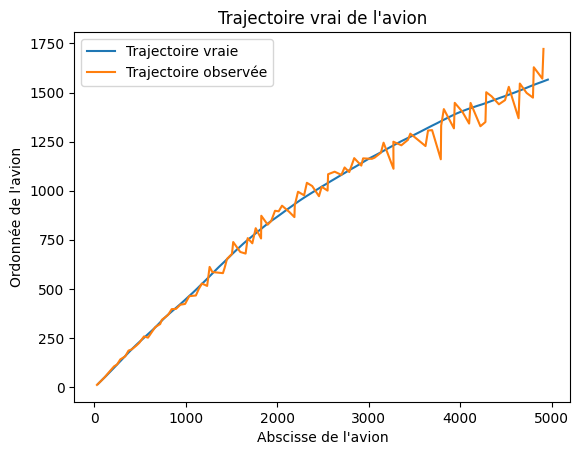

In [111]:
plt.plot(vecteur_x[0],vecteur_x[2],label="Trajectoire vraie")
plt.plot(vecteur_y[0]*np.cos(vecteur_y[1]),vecteur_y[0]*np.sin(vecteur_y[1]),label="Trajectoire observée")
plt.title("Trajectoire vrai de l'avion")
plt.xlabel("Abscisse de l'avion")
plt.ylabel("Ordonnée de l'avion")
plt.legend()
plt.show()

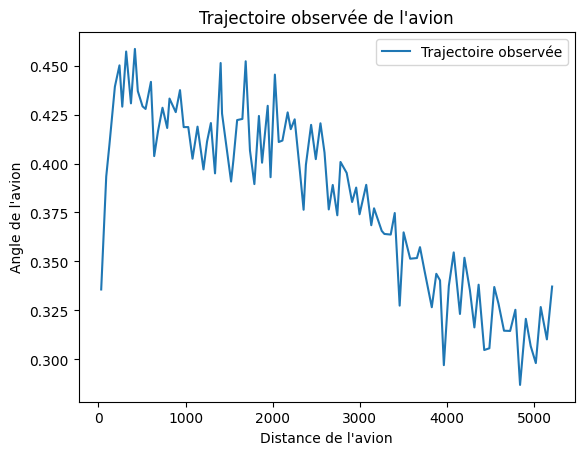

In [112]:
plt.plot(vecteur_y[0],vecteur_y[1],label="Trajectoire observée")
plt.title("Trajectoire observée de l'avion")
plt.xlabel("Distance de l'avion")
plt.ylabel("Angle de l'avion")
plt.legend()
plt.show()

In [113]:
x_kalm = x_init
P_kalm = np.eye(4,dtype=int)

def filtre_kalman_radar(F,Q,R,y_k,x_kalm_prec,P_kalm_prec):
    
    x_k_km1 = np.dot(F,x_kalm_prec)
    P_k_km1 = Q + np.dot(np.dot(F,P_kalm_prec),np.transpose(F))
    
    H_k_km1 = np.array([[x_k_km1[0]/(x_k_km1[0]**2 + x_k_km1[2]**2),0,x_k_km1[2]/(x_k_km1[0]**2 + x_k_km1[2]**2),0],
                                [-1/np.sqrt(x_k_km1[0]**2 + x_k_km1[2]**2),0,x_k_km1[0]/np.sqrt(x_k_km1[0]**2 + x_k_km1[2]**2),0]])
    
    h_k_km1 = np.array([np.arctan(x_k_km1[2]/x_k_km1[0]),np.sqrt(x_k_km1[0]**2 + x_k_km1[2]**2)])

    inv = np.linalg.inv(np.dot(np.dot(H_k_km1,P_k_km1),np.transpose(H_k_km1)) + R)
    K = np.dot(np.dot(P_k_km1,np.transpose(H_k_km1)),inv)
    
    x_k_k = x_k_km1 + np.dot(K,y_k - h_k_km1)
    P_k_k = np.dot(np.eye(4)-np.dot(K,H_k_km1),P_k_km1)
    return x_k_k, P_k_k

filtre_kalman_radar(F,Q,R,vecteur_y[:,0],x_kalm,P_kalm)

(array([ 44.14479805,  40.7359416 , -32.56148606, -11.21809818]),
 array([[2.33204917e+00, 1.49917447e+00, 5.42256411e-02, 3.48593407e-02],
        [1.49917447e+00, 1.99946930e+00, 3.48593407e-02, 2.24095762e-02],
        [5.42256411e-02, 3.48593407e-02, 1.60761514e-03, 1.03346688e-03],
        [3.48593407e-02, 2.24095762e-02, 1.03346688e-03, 1.03637866e+00]]))

[[ 4.41447980e+001  4.07359416e+001 -3.25614861e+001 -1.12180982e+001]
 [ 8.05687913e+001  3.99763493e+001 -1.50818946e+002 -1.31140188e+002]
 [ 1.38167337e+002  4.48554014e+001 -1.05846860e+003 -1.10634893e+003]
 [-1.73023741e+003 -4.40269301e+002 -2.63257579e+004 -3.14283138e+004]
 [ 4.26202064e+005  1.10369121e+005  1.16410390e+006  1.30014278e+006]
 [ 2.96543794e+006  5.72158783e+005 -9.33483804e+006 -8.93895153e+006]
 [ 1.43914369e+007  2.35983128e+006 -1.15228538e+008 -1.23768745e+008]
 [-7.23647304e+007 -1.02029844e+007 -3.37981921e+009 -3.94538336e+009]
 [ 1.69848201e+007  2.15169399e+006  1.73393718e+011  1.84612126e+011]
 [ 1.01376801e+008  1.12457527e+007  1.37768383e+011  3.94882305e+010]
 [ 1.32112222e+009  1.31156737e+008 -3.67803805e+012 -1.75605756e+012]
 [ 2.81578123e+010  2.54095557e+009 -1.17125583e+014 -4.17698960e+013]
 [ 8.64958927e+011  7.15894690e+010 -4.63045038e+015 -1.34066616e+015]
 [ 3.56193028e+013  2.72273305e+012 -2.36770698e+017 -5.76737098e+016]
 [ 1.8

/var/folders/wy/7nm2pvj972sb9zgtnh3p7k0w0000gn/T/ipykernel_63540/2628910211.py:9: RuntimeWarning: overflow encountered in scalar power
  H_k_km1 = np.array([[x_k_km1[0]/(x_k_km1[0]**2 + x_k_km1[2]**2),0,x_k_km1[2]/(x_k_km1[0]**2 + x_k_km1[2]**2),0],
/var/folders/wy/7nm2pvj972sb9zgtnh3p7k0w0000gn/T/ipykernel_63540/2628910211.py:10: RuntimeWarning: overflow encountered in scalar power
  [-1/np.sqrt(x_k_km1[0]**2 + x_k_km1[2]**2),0,x_k_km1[0]/np.sqrt(x_k_km1[0]**2 + x_k_km1[2]**2),0]])
/var/folders/wy/7nm2pvj972sb9zgtnh3p7k0w0000gn/T/ipykernel_63540/2628910211.py:12: RuntimeWarning: overflow encountered in scalar power
  h_k_km1 = np.array([np.arctan(x_k_km1[2]/x_k_km1[0]),np.sqrt(x_k_km1[0]**2 + x_k_km1[2]**2)])


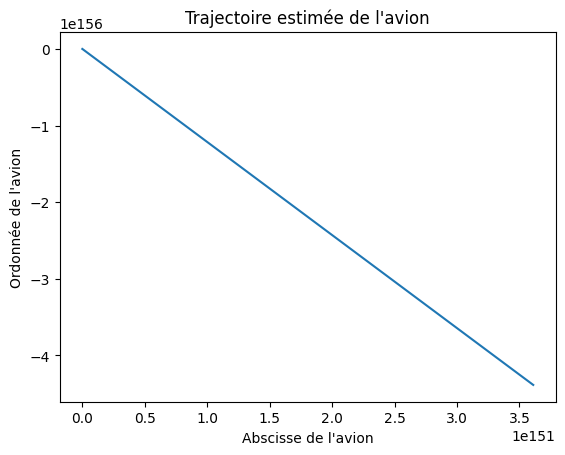

In [114]:
l_x = []
l_P = []
x_kalm = x_init
P_kalm = np.eye(4,dtype=int)
for i in range(0,T):
    x_kalm,P_kalm = filtre_kalman_radar(F,Q,R,vecteur_y[:,i],x_kalm,P_kalm)
    l_x.append(x_kalm)
    l_P.append(P_kalm)
x_est = np.array(l_x)
print(x_est)

plt.plot(x_est[:,0],x_est[:,2])
plt.plot(vecteur_x[0],vecteur_x[2])
plt.title("Trajectoire estimée de l'avion")
plt.xlabel("Abscisse de l'avion")
plt.ylabel("Ordonnée de l'avion")
plt.show()

In [115]:
def err_quadra(k):
    
    delta = np.transpose(vecteur_x)[k]- x_est[k]
    err = np.dot(np.transpose(delta),delta)
    return err

print(err_quadra(3))

1689850296.5128582


In [116]:
def err_moy():
    sum=0
    for k in range(0,T):
        sum += err_quadra(k) 
    err_moy = (1/T)*np.sqrt(sum)
    return err_moy

err_30_1 = err_moy()
print(err_30_1)

nan


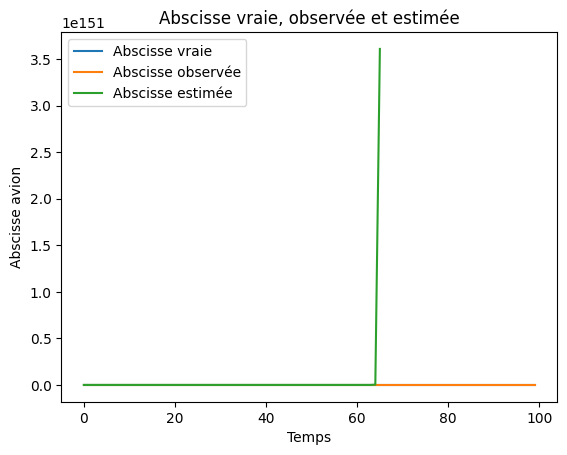

In [117]:
plt.plot(vecteur_x[0],label='Abscisse vraie')
plt.plot(vecteur_y[0],label='Abscisse observée')
plt.plot(x_est[:,0],label='Abscisse estimée')
plt.title("Abscisse vraie, observée et estimée")
plt.xlabel("Temps")
plt.ylabel("Abscisse avion")
plt.legend()
plt.show()

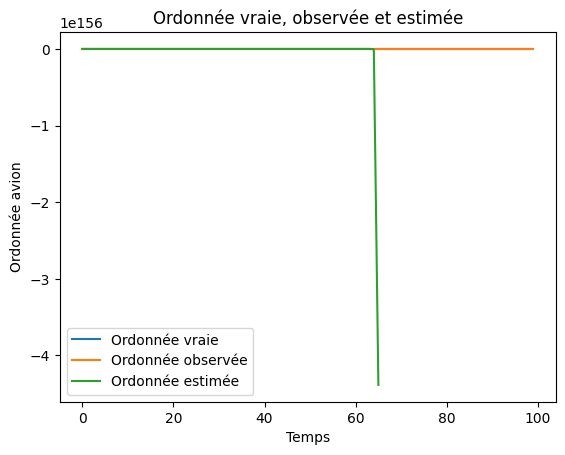

In [118]:
plt.plot(vecteur_x[2],label='Ordonnée vraie')
plt.plot(vecteur_y[1],label='Ordonnée observée')
plt.plot(x_est[:,2],label='Ordonnée estimée')
plt.title("Ordonnée vraie, observée et estimée")
plt.xlabel("Temps")
plt.ylabel("Ordonnée avion")
plt.legend()
plt.show()

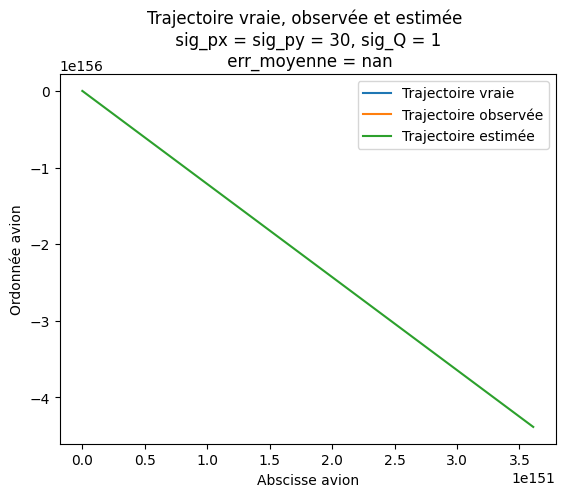

In [119]:
plt.plot(vecteur_x[0],vecteur_x[2],label='Trajectoire vraie')
plt.plot(vecteur_y[0],vecteur_y[1],label='Trajectoire observée')
plt.plot(x_est[:,0],x_est[:,2],label='Trajectoire estimée')
plt.title(f"Trajectoire vraie, observée et estimée \n sig_px = sig_py = 30, sig_Q = 1 \n err_moyenne = {err_30_1}")
plt.xlabel("Abscisse avion")
plt.ylabel("Ordonnée avion")
plt.legend()
plt.show()

In [120]:
sig_px = 60
sig_py = 60
    
R = np.array([[sig_px**2,0],
            [0,sig_py**2]])

vecteur_y = creer_observation(H,R,vecteur_x,T)
    
l_x = []
l_P = []

x_kalm = x_init
P_kalm = np.eye(4,dtype=int)

for i in range(0,T):
    x_kalm,P_kalm = filtre_kalman(F,Q,H,R,vecteur_y[:,i],x_kalm,P_kalm)
    l_x.append(x_kalm)
    l_P.append(P_kalm)
x_est = np.array(l_x)

err_60_1 = err_moy()

plt.plot(vecteur_x[0],vecteur_x[2],label="Trajectoire vraie")
plt.plot(vecteur_y[0],vecteur_y[1],label="Trajectoire observée")
plt.plot(x_est[:,0],x_est[:,2],label="Trajectoire estimée")
plt.title(f"Trajectoire vraie, observée et estimée de l'avion \n sig_px = sig_py = 60, sig_Q = 1 \n err_moyenne = {err_60_1}")
plt.xlabel("Abscisse de l'avion")
plt.ylabel("Ordonnée de l'avion")
plt.legend()
plt.show()

NameError: name 'creer_observation' is not defined

In [ ]:
sig_px = 60
sig_py = 60

sig_Q = 20
    
R = np.array([[sig_px**2,0],
            [0,sig_py**2]])

vecteur_x = creer_trajectoire(F,Q,x_init,T)

vecteur_y = creer_observation(H,R,vecteur_x,T)
    
l_x = []
l_P = []

x_kalm = x_init
P_kalm = np.eye(4,dtype=int)

for i in range(0,T):
    x_kalm,P_kalm = filtre_kalman(F,Q,H,R,vecteur_y[:,i],x_kalm,P_kalm)
    l_x.append(x_kalm)
    l_P.append(P_kalm)
x_est = np.array(l_x)

err_60_5 = err_moy()

plt.plot(vecteur_x[0],vecteur_x[2],label="Trajectoire vraie")
plt.plot(vecteur_y[0],vecteur_y[1],label="Trajectoire observée")
plt.plot(x_est[:,0],x_est[:,2],label="Trajectoire estimée")
plt.title(f"Trajectoire vraie, observée et estimée de l'avion \n sig_px = sig_py = 60, sig_Q = 20 \n err_moyenne = {err_60_5}")
plt.xlabel("Abscisse de l'avion")
plt.ylabel("Ordonnée de l'avion")
plt.legend()
plt.show()